<a href="https://colab.research.google.com/github/pragatheesha/statistical_business_analysis/blob/main/statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

sales_df = pd.read_csv("/content/sales_data.csv")
sales_df = sales_df.rename(columns={'Customer_ID': 'CustomerID'})
customer_df = pd.read_csv("/content/customer_churn.csv")

In [10]:
sales_df

,Date,Product,Quantity,Price,CustomerID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


In [11]:
customer_df

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0
...,...,...,...,...,...,...,...,...,...
495,C00496,50,128,6970,Month-to-month,Credit Card,Yes,1,0
496,C00497,2,49,5917,Two year,Bank Transfer,No,1,0
497,C00498,46,198,2158,Month-to-month,Bank Transfer,No,0,0
498,C00499,1,185,5755,Two year,Credit Card,Yes,1,1


In [21]:
business_df = pd.merge(sales_df, customer_df, on='CustomerID', how='outer')

In [22]:
business_df

,Date,Product,Quantity,Price,CustomerID,Region,Total_Sales,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,NaN,NaN,NaN,NaN,C00001,NaN,NaN,6.0,64.0,1540.0,One year,Credit Card,No,1.0,0.0
1,NaN,NaN,NaN,NaN,C00002,NaN,NaN,21.0,113.0,1753.0,Month-to-month,Electronic Check,Yes,1.0,0.0
2,NaN,NaN,NaN,NaN,C00003,NaN,NaN,27.0,31.0,1455.0,Two year,Credit Card,No,1.0,0.0
3,NaN,NaN,NaN,NaN,C00004,NaN,NaN,53.0,29.0,7150.0,Month-to-month,Electronic Check,No,1.0,0.0
4,NaN,NaN,NaN,NaN,C00005,NaN,NaN,16.0,185.0,1023.0,One year,Electronic Check,No,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2024-04-05,Tablet,8.0,20770.0,CUST096,North,166160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,2024-04-06,Headphones,1.0,7647.0,CUST097,West,7647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,2024-04-07,Tablet,5.0,27196.0,CUST098,East,135980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,2024-04-08,Monitor,1.0,30717.0,CUST099,North,30717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
business_df.shape

(600, 15)

In [26]:
business_df.to_csv("business_data.csv", index=False)

print("business_data.csv created with all values!")

business_data.csv created with all values!


In [27]:
# Import and Load business data

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("business_data.csv")
df.head()

,Date,Product,Quantity,Price,CustomerID,Region,Total_Sales,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,NaN,NaN,NaN,NaN,C00001,NaN,NaN,6.0,64.0,1540.0,One year,Credit Card,No,1.0,0.0
1,NaN,NaN,NaN,NaN,C00002,NaN,NaN,21.0,113.0,1753.0,Month-to-month,Electronic Check,Yes,1.0,0.0
2,NaN,NaN,NaN,NaN,C00003,NaN,NaN,27.0,31.0,1455.0,Two year,Credit Card,No,1.0,0.0
3,NaN,NaN,NaN,NaN,C00004,NaN,NaN,53.0,29.0,7150.0,Month-to-month,Electronic Check,No,1.0,0.0
4,NaN,NaN,NaN,NaN,C00005,NaN,NaN,16.0,185.0,1023.0,One year,Electronic Check,No,1.0,0.0


In [29]:
# Descriptive Statistics

mean_sales = df["Total_Sales"].mean()
median_sales = df["Total_Sales"].median()
std_sales = df["Total_Sales"].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Standard Deviation:", std_sales)

Mean Sales: 123650.48
Median Sales: 97955.5
Standard Deviation: 100161.08527499213


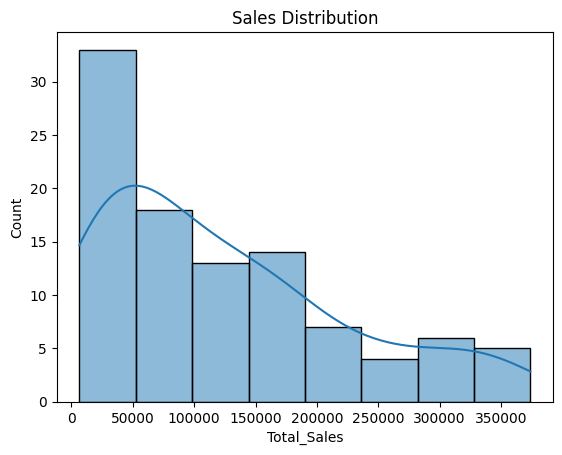

In [31]:
# Distribution analysis (Histogram + Density)

sns.histplot(df["Total_Sales"], kde=True)
plt.title("Sales Distribution")
plt.show()

Correlation (Sales vs Quantity): 0.6881074758580692


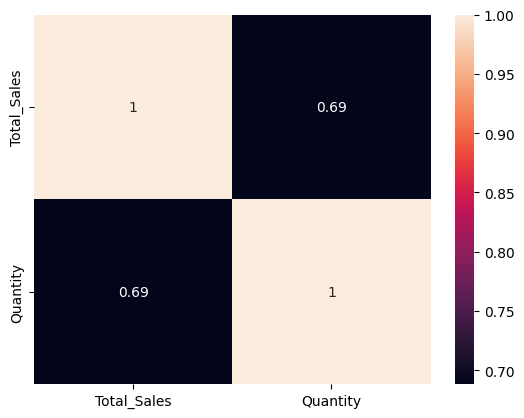

In [35]:
# Correalation Analysis

corr = df["Total_Sales"].corr(df["Quantity"])
print("Correlation (Sales vs Quantity):", corr)

sns.heatmap(df[["Total_Sales", "Quantity"]].corr(), annot=True)
plt.show()

In [36]:
# Hypothesis Testing (t-test)
# Does higher marketing spend significantly increase sales?

high_marketing = df[df["Quantity"] > df["Quantity"].median()]["Total_Sales"]
low_marketing = df[df["Quantity"] <= df["Quantity"].median()]["Total_Sales"]

t_stat, p_value = stats.ttest_ind(high_marketing, low_marketing)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 7.779538586652192
P-Value: 7.470163657941186e-12


In [38]:
# Confidence Interval(95%)

confidence_level = 0.95
mean = df["Total_Sales"].mean()
sem = stats.sem(df["Total_Sales"])

ci = stats.t.interval(confidence_level, len(df)-1, mean, sem)

print("95% Confidence Interval:", ci)

95% Confidence Interval: (np.float64(nan), np.float64(nan))


In [43]:
# Regression Analysis

# Create a new DataFrame with only the relevant columns and drop rows with NaN values
regression_df = df[['Quantity', 'Total_Sales']].dropna()

X = regression_df["Quantity"]
y = regression_df["Total_Sales"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     88.13
Date:                Fri, 23 Jan 2026   Prob (F-statistic):           2.58e-15
Time:                        09:07:54   Log-Likelihood:                -1260.8
No. Observations:                 100   AIC:                             2526.
Df Residuals:                      98   BIC:                             2531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3638.7415   1.54e+04     -0.236      0.8